<a href="https://colab.research.google.com/github/afrahnaaz/NLP/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Afrah Naaz - 19K41A05B9

NLP ASSIGNMENT - 2

A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs. This is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.

Paragraphs can contain many different kinds of information. A paragraph could contain a series of brief examples or a single long illustration of a general point. It might describe a place, character, or process; narrate a series of events; compare or contrast two or more things; classify items into categories; or describe causes and effects. Regardless of the kind of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence.

QUESTIONS:

1. Convert the above paragraph into vectors using:

  i) Word2vec

  ii) USE

  iii) ELMO

  iv) GP2

  v) Sentence-BERT

2. Find named entities (NER) for the above paragraph?

3. Find similar sentences (repeated sentences) from the above paragraph? (Cosine Similarity, use BERT to encode)

4. Explain POS tagging with HMM? Tag POS for the above paragraph?

In [35]:
# Assigning the given paragraph to a variable

para = '''A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs. This is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.
Paragraphs can contain many different kinds of information. A paragraph could contain a series of brief examples or a single long illustration of a general point. It might describe a place, character, or process; narrate a series of events; compare or contrast two or more things; classify items into categories; or describe causes and effects. Regardless of the kind of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence.
'''
para

'A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs. This is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.\nParagraphs can contain many different kinds of information. A paragraph could contain a series of brief examples or a single long illustration of a general point. It might describe a place, character, or process; narrate a series of events; compare or contrast two or more things; classify items into categories; or describe causes and effects. Regardless of the kind of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence.\n'

In [36]:
# 1. Converting the paragraph to vectors:
# importing required packages

import numpy as np
import re
import nltk
import gensim
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.tokenize import PunktSentenceTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
#code to convert paragraph to sentences

def essay_to_sentences(paragraph):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(paragraph.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append((raw_sentence))
    return sentences

sentences=essay_to_sentences(para)

sentences

['A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic.',
 'Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs.',
 'This is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.',
 'Paragraphs can contain many different kinds of information.',
 'A paragraph could contain a series of brief examples or a single long illustration of a general point.',
 'It might describe a place, character, or process; narrate a series of events; compare or contrast two or more things; classify items into categories; or describe causes and effects.',
 'Regardless of the kind of information they contain, all paragraphs share certain characteristics.',
 'One of the most important of these is a topic sentence.']

In [38]:
# i) Word2vec : 
# initializing the word2vec model, converting words to vectors and removing stop words

wordvecs=[nltk.word_tokenize(s) for s in sentences]
from nltk.corpus import stopwords
nltk.download('stopwords')
stops_words=list(set(stopwords.words("english")))

for i in wordvecs:
  for j in i:
    if j in stops_words:
      i.remove(j)
    elif len(j)==1:
      i.remove(j)

model=gensim.models.Word2Vec(wordvecs,min_count=1)

#printing the converted vector form of word 'organized'

model.wv['organized']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array([ 3.2097253e-03, -2.6461398e-04, -1.7136511e-03, -1.1484771e-03,
       -1.7922018e-03,  2.0786696e-03, -2.3396830e-03,  1.4447976e-03,
       -4.8394362e-03,  1.0153570e-03,  2.6193210e-03,  2.6141051e-03,
       -4.6579195e-03, -4.5185277e-04,  2.8911980e-03,  1.3906594e-03,
       -2.0415974e-03, -8.2430302e-04, -2.2154378e-03, -1.2575752e-03,
       -8.2535797e-04, -2.6003695e-03, -9.8398654e-04, -4.1722874e-03,
        2.4544029e-03, -2.4123401e-03,  1.5293327e-03,  4.4046608e-03,
       -5.6886900e-04,  4.5225201e-03,  4.4689891e-03,  4.7611934e-03,
        2.6718176e-03, -2.6313162e-03, -4.5131063e-03,  1.3617292e-05,
        1.0691860e-03, -4.2078146e-03,  4.9151643e-03,  1.9739452e-03,
        5.2679575e-04, -3.6259682e-03, -2.0907058e-03,  2.6874992e-03,
        3.3068049e-03, -2.2885471e-03,  1.2884773e-03,  3.6844944e-03,
       -2.7128148e-03,  2.9180132e-04,  1.2958389e-03, -3.2819207e-03,
        4.8696180e-03,  2.5543466e-03, -4.9126470e-03, -2.7088443e-04,
      

In [39]:
# ii) USE : 
# importing the USE Model

import tensorflow_hub as hub
vect=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#converting to vectors
res_vectors=vect(sentences)
print(res_vectors)

Tensor("StatefulPartitionedCall_3:0", shape=(None, 512), dtype=float32)


In [40]:
print("shape= ",res_vectors[0].shape)

#each sentence is converted into vector having 512 values

print("The sentence: ",sentences[0],"\n is converted as : \n{}".format(res_vectors[0]))

shape=  (512,)
The sentence:  A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 is converted as : 
Tensor("strided_slice_5:0", shape=(512,), dtype=float32)


In [41]:
# iii) ELMO
# importing the ELMO Model

import tensorflow_hub as hub
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
#1024 sized vectors
elmo=hub.Module("https://tfhub.dev/google/elmo/3",trainable=True)
embeddings=elmo(
    sentences,
    signature="default",
    as_dict=True)["elmo"]
init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)
print("\n\n")
print(sess.run(embeddings[0]))
print("shape=",embeddings[0].shape)




[[ 0.29287004 -0.14378013 -0.32574052 ... -0.39559263 -0.35758853
  -0.03588088]
 [-0.59441584  0.09640743  0.50537694 ...  0.22031914  0.269769
   0.46307266]
 [-0.1708326  -0.18744111 -0.27626696 ... -0.67550904  0.25389987
   0.6540271 ]
 ...
 [-0.0284084  -0.04353216  0.04130162 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.0284084  -0.04353216  0.04130162 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.0284084  -0.04353216  0.04130162 ...  0.02583168 -0.01429836
  -0.01650422]]
shape= (32, 1024)


In [42]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
# iv) GP2
#importing the GP2 Model

import transformers
gptokenizer=transformers.GPT2Tokenizer.from_pretrained('gpt2-large')
model=transformers.GPT2LMHeadModel.from_pretrained('gpt2-large')
res_vectors=gptokenizer.encode(para,add_special_tokens=False,return_tensors="pt")
print("shape=",res_vectors.shape)
res_vectors

shape= torch.Size([1, 173])


tensor([[   32,  7322,   318,   257,  2168,   286, 13439,   326,   389,  8389,
           290, 24870,    11,   290,   389,   477,  3519,   284,   257,  2060,
          7243,    13, 16699,   790,  3704,   286,  3597,   345,   466,   326,
           318,  2392,   621,   257,  1178, 13439,   815,   307,  8389,   656,
         23549,    13,   770,   318,   780, 23549,   905,   257,  9173,   810,
           262, 45944,  3279,   286,   281, 14268,  2221,   290,   886,    11,
           290,  4145,  1037,   262,  9173,   766,   262,  4009,   286,   262,
         14268,   290, 13180,   663,  1388,  2173,    13,   198, 10044,  6111,
            82,   460,  3994,   867,  1180,  6982,   286,  1321,    13,   317,
          7322,   714,  3994,   257,  2168,   286,  4506,  6096,   393,   257,
          2060,   890, 20936,   286,   257,  2276,   966,    13,   632,  1244,
          6901,   257,  1295,    11,  2095,    11,   393,  1429,    26,  6664,
           378,   257,  2168,   286,  2995,    26,  

In [44]:
# v) Sentence-BERT
#importing sentencebert model

bert = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings=bert(sentences)
print(embeddings)

Tensor("keras_layer_1/StatefulPartitionedCall:0", shape=(None, 128), dtype=float32)


In [45]:
print("shape=",embeddings[0].shape)
#each sentence is converted into vector having 128 values
print("The sentence in the paragraph: ",sentences[0],"\n is converted into vector  as : \n{}".format(embeddings[0]))
shape= (128,)

shape= (128,)
The sentence in the paragraph:  A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 is converted into vector  as : 
Tensor("strided_slice_9:0", shape=(128,), dtype=float32)


In [46]:
# 2. Find named entities (NER) for the above paragraph?
import spacy
from spacy import displacy
ner=spacy.load('en_core_web_sm')
res=ner(para)

for word in res.ents:
  print(word.text,word.label_)

two CARDINAL
One CARDINAL


In [47]:
spacy.explain('GPE')

'Countries, cities, states'

In [48]:
#better visualisation of entity recognition
displacy.render(res,style="ent",jupyter=True)

A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs. This is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.Paragraphs can contain many different kinds of information. A paragraph could contain a series of brief examples or a single long illustration of a general point. It might describe a place, character, or process; narrate a series of events; compare or contrast two CARDINAL or more things; classify items into categories; or describe causes and effects. Regardless of the kind of information they contain, all paragraphs share certain characteristics. One CARDINAL of the most important of these is a topic sentence.


1. Find similar sentences (repeated sentences) from the above paragraph? (Cosine Similarity, use BERT to encode)

In [49]:
pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


3. Find similar sentences(repeated sentences) from the above paragraph?

In [50]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [51]:
# using BERT to Encode
se_embeddings = sbert_model.encode(sentences)
q1_vec= sbert_model.encode(sentences[0])

#cosine similarity function
#identifies similarity between 2 sentences
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

for sent in sentences:
  sim = cosine(q1_vec, sbert_model.encode([sent])[0])
  #if similarity ==1 => repeated sentence
  #if similarity > 0.6 => similar sentence
  if sim>0.6:
    print("Sentence1 =",sentences[0],"\n \nSentence2=", sent, "\n\nsimilarity = ", sim,end="\n ----------------------------- \n")

Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 
Sentence2= A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 

similarity =  1.0
 ----------------------------- 
Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 
Sentence2= Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs. 

similarity =  0.6477537
 ----------------------------- 
Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 
Sentence2= A paragraph could contain a series of brief examples or a single long illustration of a general point. 

similarity =  0.69272894
 ----------------------------- 
Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all related to

4. Explain POS tagging with HMM? Tag POS for the above paragraph? 

POS Tagging with HMM

Parts of Speech Tagging (POS): It is a process of converting a sentence to forms – list of words, list of tuples (where each tuple is having a form (word, tag)). The tag in case of is a part-of-speech tag, and signifies whether the word is a noun, adjective, verb, and so on. reading a sentence and being able to identify what words act as nouns, pronouns, verbs, adverbs, and so on. All these are referred to as the part of speech tags.
  According to Wikipedia, part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging or word-category disambiguation, is the process of marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context i.e. its relationship with adjacent and related words in a phrase, sentence, or paragraph.

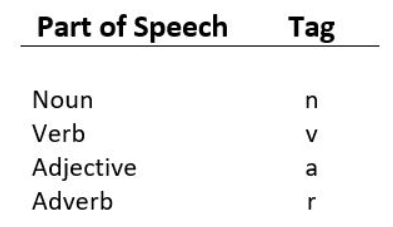

Default tagging is a basic step for the part-of-speech tagging. It is performed using the DefaultTagger class. The DefaultTagger class takes ‘tag’ as a single argument. NN is the tag for a singular noun. DefaultTagger is most useful when it gets to work with most common part-of-speech tag. that’s why a noun tag is recommended.

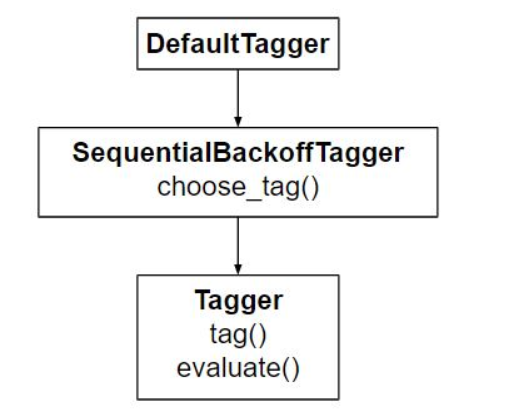

**POS tagging with Hidden Markov Model**
HMM (Hidden Markov Model) is a Stochastic technique for POS tagging. Hidden Markov models are known for their applications to reinforcement learning and temporal pattern recognition such as speech, handwriting, gesture recognition, musical score following, partial discharges, and bioinformatics.

Let us consider an example proposed by Dr.Luis Serrano and find out how HMM selects an appropriate tag sequence for a sentence.

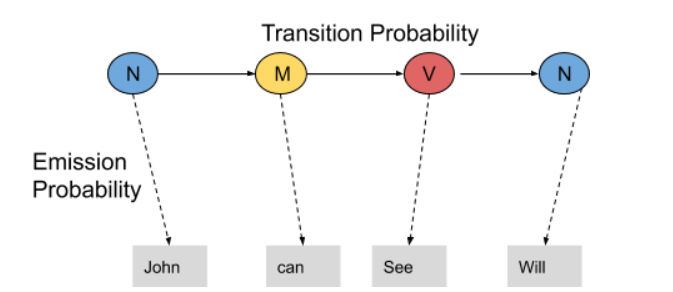

In this example, we consider only 3 POS tags that are noun, model and verb. Let the sentence “ Ted will spot Will ” be tagged as noun, model, verb and a noun and to calculate the probability associated with this particular sequence of tags we require their Transition probability and Emission probability.

The transition probability is the likelihood of a particular sequence for example, how likely is that a noun is followed by a model and a model by a verb and a verb by a noun. This probability is known as Transition probability. It should be high for a particular sequence to be correct.

Now, what is the probability that the word Ted is a noun, will is a model, spot is a verb and Will is a noun. These sets of probabilities are Emission probabilities and should be high for our tagging to be likely.

Let us calculate the above two probabilities for the set of sentences below


Mary Jane can see Will
Spot will see Mary
Will Jane spot Mary?
Mary will pat Spot
Note that Mary Jane, Spot, and Will are all names.



In the above figure, we can see that the < S > tag is followed by the N tag three times, thus the first entry is 3.The model tag follows the < S > just once, thus the second entry is 1. In a similar manner, the rest of the table is filled.

Next, we divide each term in a row of the table by the total number of co-occurrences of the tag in consideration, for example, The Model tag is followed by any other tags four times (in total) as shown below, thus we divide each element in the third row by four.


the table is refined as below:


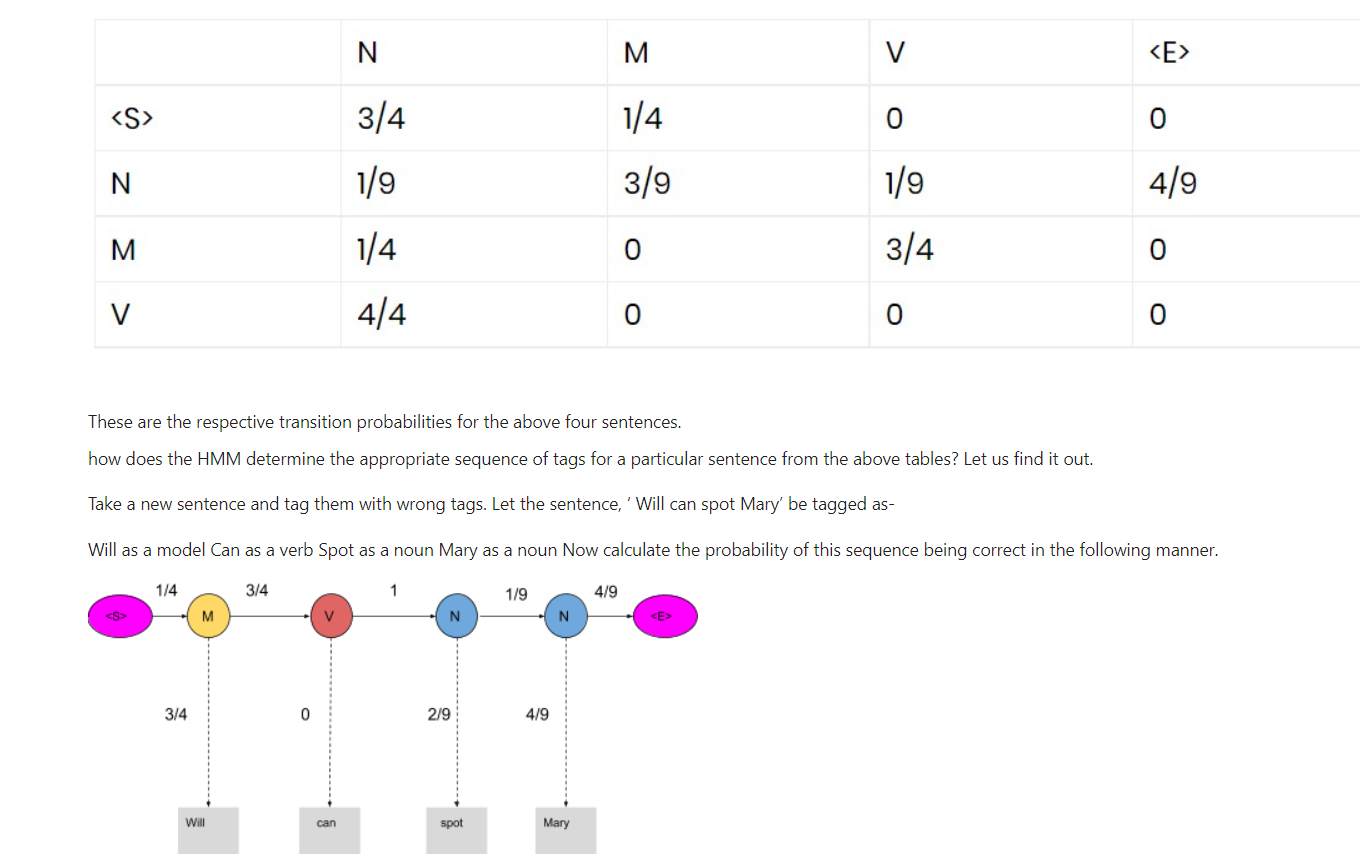

Calculating the product of these terms we get,

3/41/93/91/43/41/414/94/9=0.00025720164

For our example, keeping into consideration just three POS tags we have mentioned, 81 different combinations of tags can be formed. In this case, calculating the probabilities of all 81 combinations seems achievable. But when the task is to tag a larger sentence and all the POS tags in the Penn Treebank project are taken into consideration, the number of possible combinations grows exponentially and this task seems impossible to achieve. Now let us visualize these 81 combinations as paths and using the transition and emission probability mark each vertex and edge as shown below.


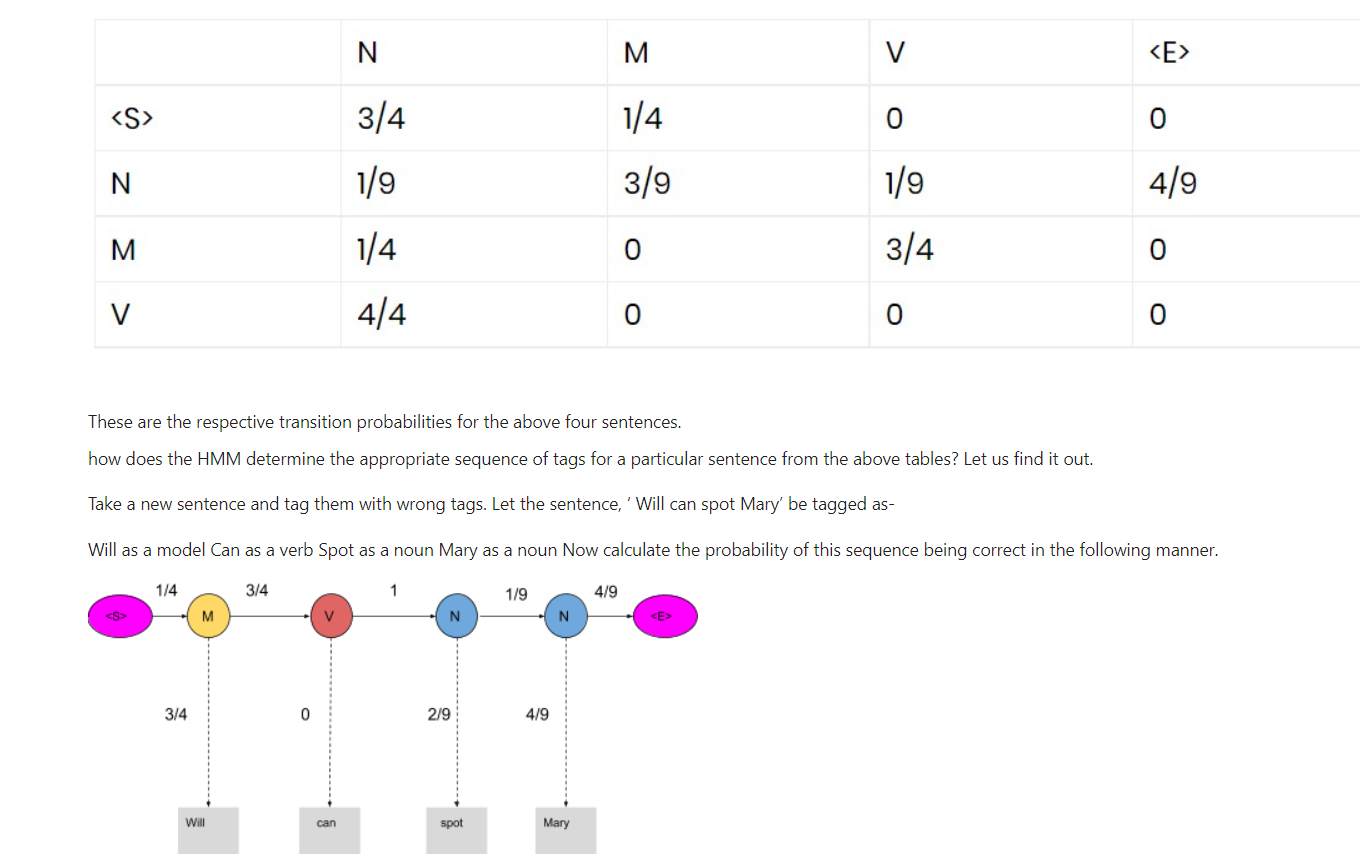

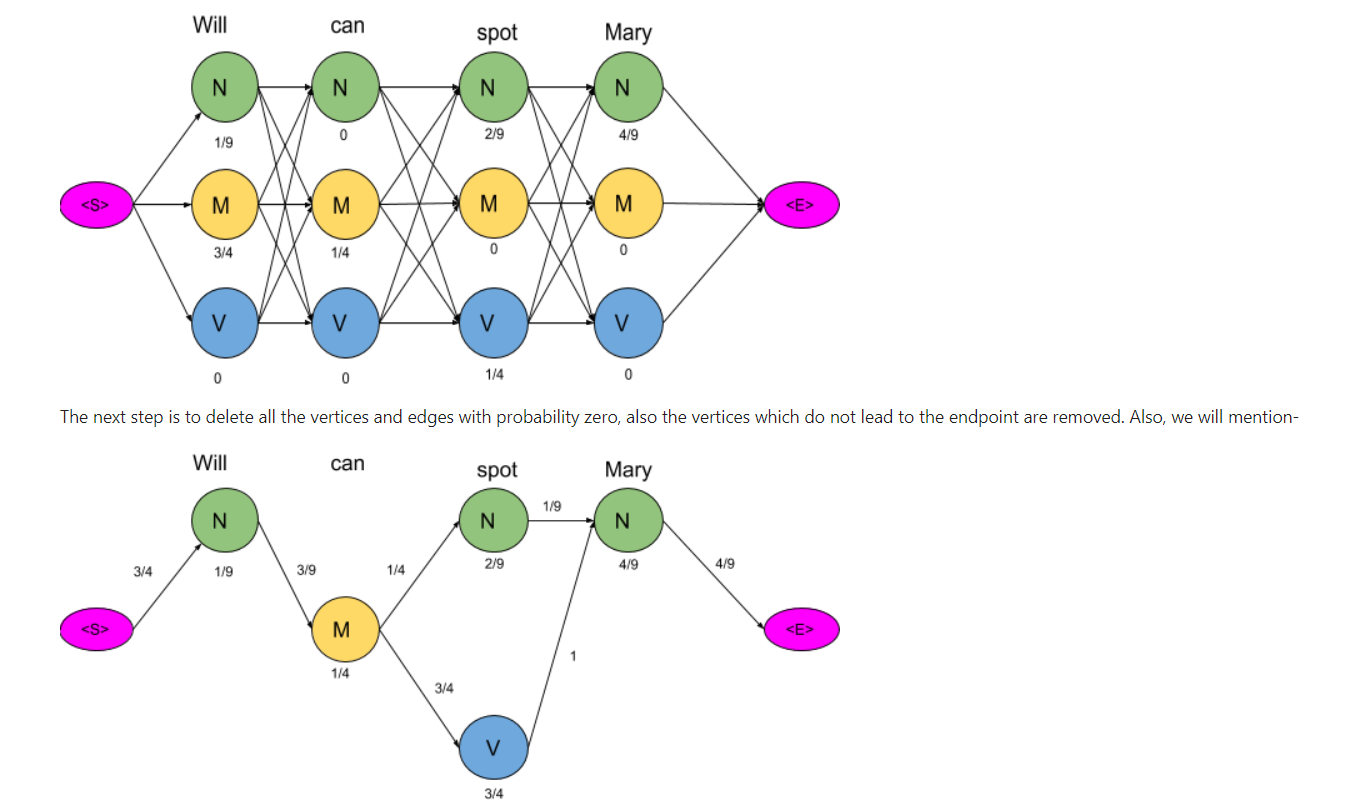

Now there are only two paths that lead to the end, let us calculate the probability associated with each path.

s→N→M→N→N→ E =3/41/93/91/41/42/91/94/94/9=0.00000846754

s→N→M→N→V→E=3/41/93/91/43/41/414/94/9=0.00025720164

Clearly, the probability of the second sequence is much higher and hence the HMM is going to tag each word in the sentence according to this sequence.

In [52]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [53]:
# POS Tagging for Above Given Paragraph
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
 
txt = "A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic." \
    "Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs." \
    "This is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points." \
    "Paragraphs can contain many different kinds of information." \
    "A paragraph could contain a series of brief examples or a single long illustration of a general point." \
    "It might describe a place, character, or process; narrate a series of events; compare or contrast two or more things; classify items into categories; or describe causes and effects." \
    "Regardless of the kind of information they contain, all paragraphs share certain characteristics." \
    "One of the most important of these is a topic sentence."
 
# sent_tokenize is one of instances of
# PunktSentenceTokenizer from the nltk.tokenize.punkt module
 
tokenized = sent_tokenize(txt)
for i in tokenized:
     
    # Word tokenizers is used to find the words
    # and punctuation in a string
    wordsList = nltk.word_tokenize(i)
 
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in stop_words]
 
    #  Using a Tagger. Which is part-of-speech
    # tagger or POS-tagger.
    tagged = nltk.pos_tag(wordsList)
 
    print(tagged)

[('A', 'DT'), ('paragraph', 'NN'), ('series', 'NN'), ('sentences', 'NNS'), ('organized', 'VBN'), ('coherent', 'NN'), (',', ','), ('related', 'VBN'), ('single', 'JJ'), ('topic.Almost', 'NN'), ('every', 'DT'), ('piece', 'NN'), ('writing', 'VBG'), ('longer', 'JJR'), ('sentences', 'NNS'), ('organized', 'VBD'), ('paragraphs.This', 'NN'), ('paragraphs', 'NN'), ('show', 'NN'), ('reader', 'NN'), ('subdivisions', 'NNS'), ('essay', 'VBP'), ('begin', 'JJ'), ('end', 'NN'), (',', ','), ('thus', 'RB'), ('help', 'NN'), ('reader', 'VB'), ('see', 'VB'), ('organization', 'NN'), ('essay', 'VB'), ('grasp', 'NN'), ('main', 'JJ'), ('points.Paragraphs', 'NN'), ('contain', 'VBP'), ('many', 'JJ'), ('different', 'JJ'), ('kinds', 'NNS'), ('information.A', 'VBP'), ('paragraph', 'NN'), ('could', 'MD'), ('contain', 'VB'), ('series', 'NN'), ('brief', 'NN'), ('examples', 'VBZ'), ('single', 'JJ'), ('long', 'JJ'), ('illustration', 'NN'), ('general', 'JJ'), ('point.It', 'NN'), ('might', 'MD'), ('describe', 'VB'), ('plac